In [1]:
import Simulacion
import matplotlib.pyplot as plt
import numpy as np
import threading
from concurrent.futures.thread import ThreadPoolExecutor

In [2]:
alfas = [0.01, 0.05, 0.1, 0.2, 0.35, 0.5, 1]
tiempo = 10
n = 1000
m = 20
dias, diasBase = 7, 5
lat, latBase = 5, 3
betas = [0.1, 1, 2, 5]

In [3]:
def Informar(n : int, m : int , tiempo : int, dias : int, diasBase : int, lat : int, latBase : int, alfas : list[int], beta : list[int]):
    lalfas = len(alfas)
    lbetas = len(betas)
    

    resultados : list[list[Simulacion.Resultado]] = [[None]*lbetas for _ in range(lalfas)]

    def _simulacion(i, j):
        resultados[i][j] = Simulacion.Simular(n, m, t = tiempo, dias = dias, diasBase = diasBase, lat = lat, latBase = latBase, alfa = alfas[i], beta = betas[j])

    hilos = [ threading.Thread(target=_simulacion, args=(i, j)) for i in range(lalfas) for j in range(lbetas)]

    for hilo in hilos:
        hilo.start()
    
    for hilo in hilos:
        hilo.join()

    metricas = ["Contagios", "Satisfaccion", "Asistencias"]

    ax, fig = plt.subplots( lbetas, len(metricas), figsize=(50, 40))
    
    

    for i in range(lbetas):
        for j in range(len(metricas)):
            ax = fig[i][j]
            for k in range(lalfas):
                ax.plot(resultados[k][i][metricas[j]], label=f'Alfa={alfas[k]}')
            ax.set_title(f'{metricas[j]}\n Beta={betas[i]}, N={n}, M={m}, Tiempo={tiempo}, Dias={dias}, DiasBase={diasBase}, Lat={lat}, LatBase={latBase}')
            ax.axis(ymin=0, ymax=n*1.1)
            ax.legend()



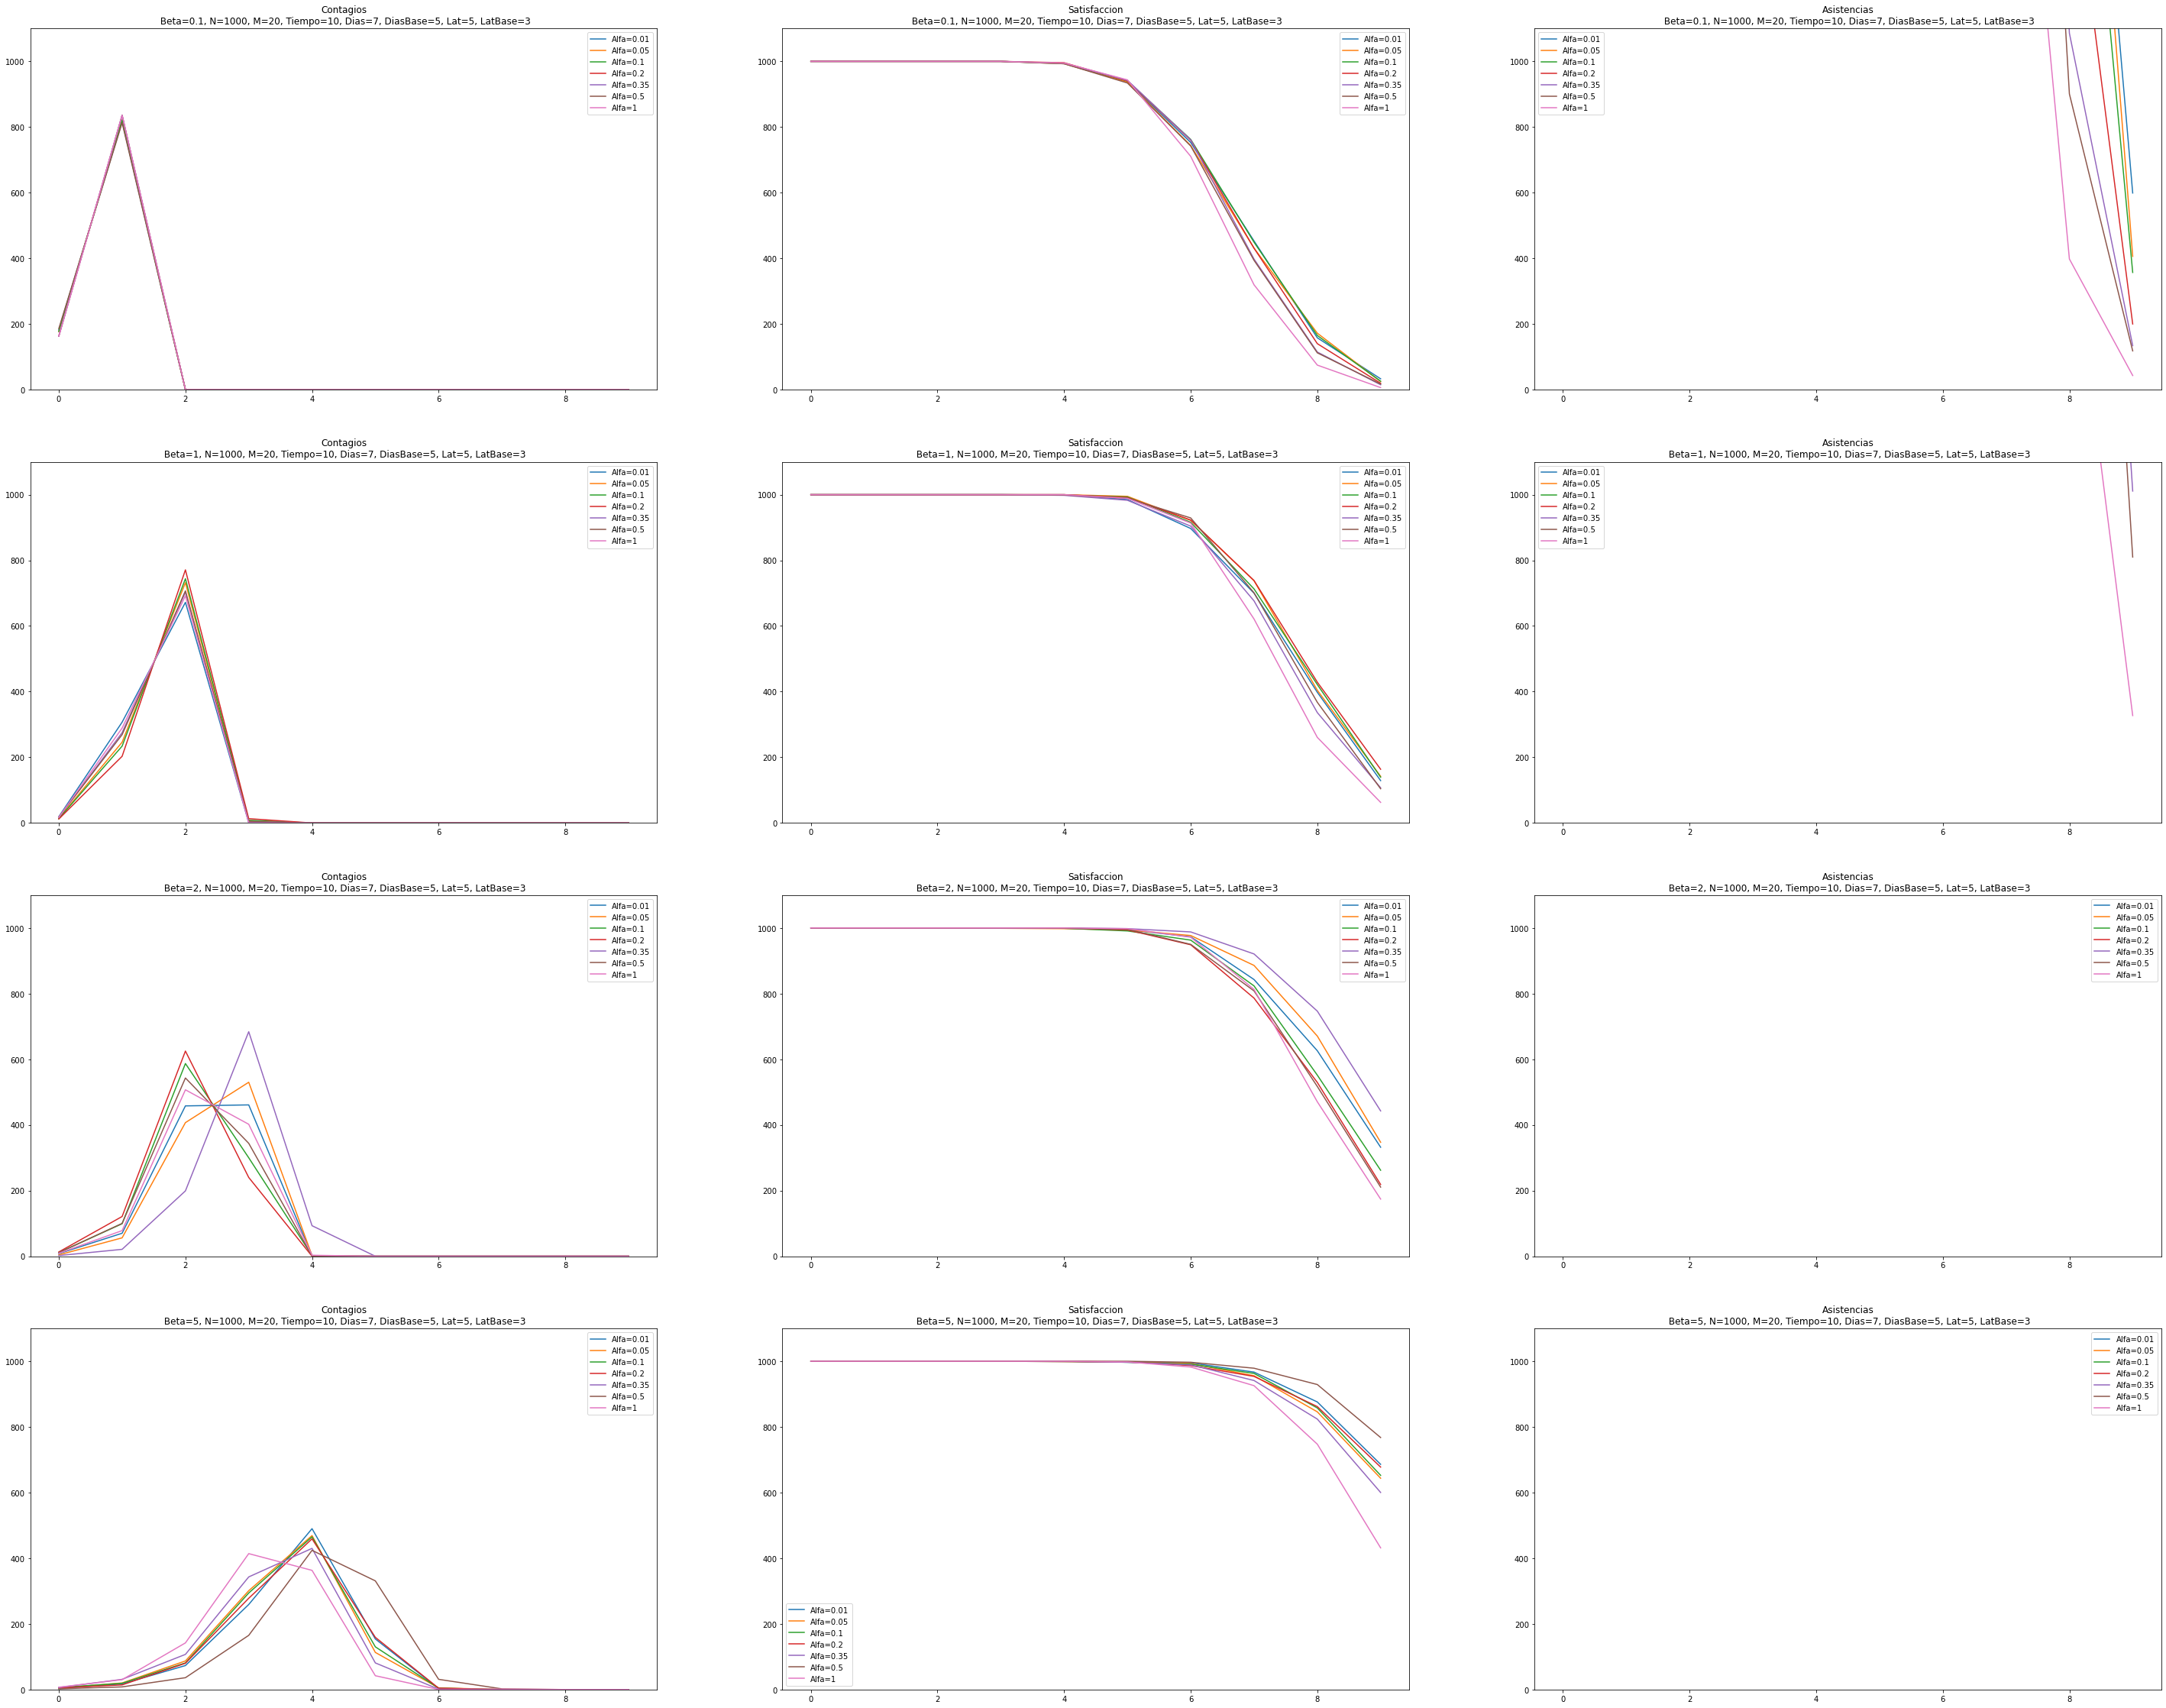

In [4]:
Informar(n, m, tiempo, dias, diasBase, lat, latBase, alfas, betas)